In [2]:
import pandas as pd

In [3]:
daily_df = pd.read_csv('./time_tracker_data_10k.csv')
daily_df

,id,date,activity,cognito_uuid
0,435108,2023-04-10 02:15:27.014835+00,Coding,daa38dbb-ee91-4898-b48d-61031c5965ed
1,435107,2023-04-10 02:15:26.035553+00,Coding,daa38dbb-ee91-4898-b48d-61031c5965ed
2,435106,2023-04-10 02:15:25.061116+00,Coding,daa38dbb-ee91-4898-b48d-61031c5965ed
3,435105,2023-04-10 02:15:24.098218+00,Coding,daa38dbb-ee91-4898-b48d-61031c5965ed
4,435104,2023-04-10 02:15:23.04628+00,Coding,daa38dbb-ee91-4898-b48d-61031c5965ed
...,...,...,...,...
9995,425113,2023-04-09 23:28:46.074701+00,Gaming,daa38dbb-ee91-4898-b48d-61031c5965ed
9996,425112,2023-04-09 23:28:45.021263+00,Gaming,daa38dbb-ee91-4898-b48d-61031c5965ed
9997,425111,2023-04-09 23:28:44.041122+00,Gaming,daa38dbb-ee91-4898-b48d-61031c5965ed
9998,425110,2023-04-09 23:28:43.050979+00,Gaming,daa38dbb-ee91-4898-b48d-61031c5965ed


In [11]:
dates = pd.to_datetime(daily_df['date']).dt.strftime('%y-%m-%d %r')
dates
# update date column
daily_df['date'] = dates
# delete id and cognito_uuid columns
new_daily_df = daily_df.drop(['id', 'cognito_uuid'], axis=1)
new_daily_df
# write to csv
new_daily_df.to_csv('./time_tracker_data_10k_clean.csv', index=False)

/tmp/ipykernel_1736940/512657446.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(daily_df['date']).dt.strftime('%y-%m-%d %r')


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Convert date to datetime and set as index
new_daily_df['date'] = pd.to_datetime(new_daily_df['date'])
new_daily_df.set_index('date', inplace=True)


/tmp/ipykernel_1736940/2387494849.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_daily_df['date'] = pd.to_datetime(new_daily_df['date'])


In [14]:
new_daily_df

,activity
date,
2023-04-10 02:15:27,Coding
2023-04-10 02:15:26,Coding
2023-04-10 02:15:25,Coding
2023-04-10 02:15:24,Coding
2023-04-10 02:15:23,Coding
...,...
2023-04-09 23:28:46,Gaming
2023-04-09 23:28:45,Gaming
2023-04-09 23:28:44,Gaming


There are several creative ways to visualize your time tracking data using Python and pandas, along with some popular visualization libraries like Matplotlib, Seaborn, and Plotly. Here are a few suggestions:

Time spent on each activity per day
You can start by aggregating the data to calculate the total time spent on each activity per day. Then you can create a stacked bar chart or a heatmap to visualize the daily time allocation.

In [16]:
daily_data = new_daily_df.groupby('activity').resample('D').size().unstack(0).fillna(0)
daily_data

activity,Break,Coding,Gaming,Learning
date,,,,
2023-04-09,0.0,0.0,1878.0,0.0
2023-04-10,1372.0,834.0,5914.0,2.0


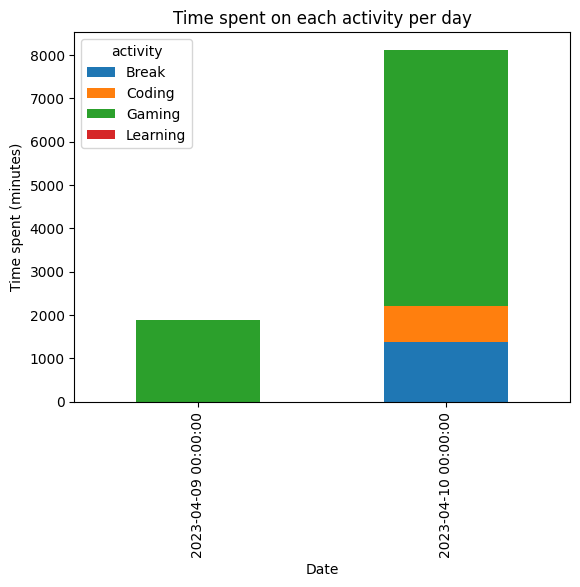

In [17]:
daily_data.plot(kind='bar', stacked=True)
plt.xlabel('Date')
plt.ylabel('Time spent (minutes)')
plt.title('Time spent on each activity per day')
plt.show()

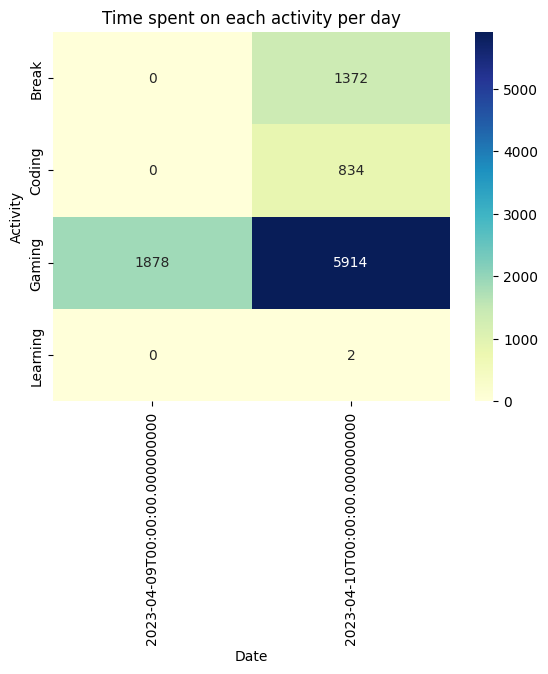

In [18]:
sns.heatmap(daily_data.T, annot=True, fmt=".0f", cmap="YlGnBu")
plt.xlabel('Date')
plt.ylabel('Activity')
plt.title('Time spent on each activity per day')
plt.show()

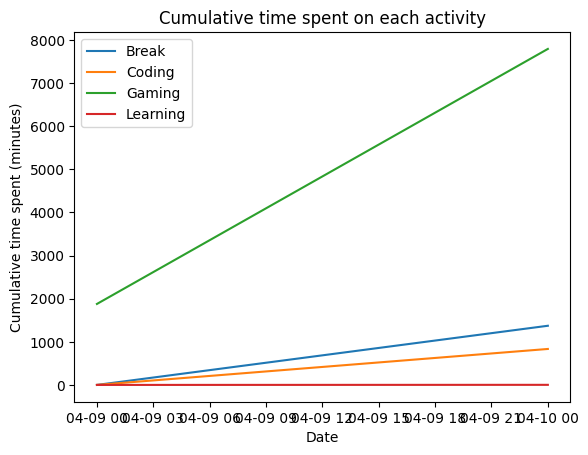

In [19]:
cumulative_data = daily_data.cumsum()

plt.figure()
for activity in cumulative_data.columns:
    plt.plot(cumulative_data.index, cumulative_data[activity], label=activity)

plt.xlabel('Date')
plt.ylabel('Cumulative time spent (minutes)')
plt.title('Cumulative time spent on each activity')
plt.legend()
plt.show()


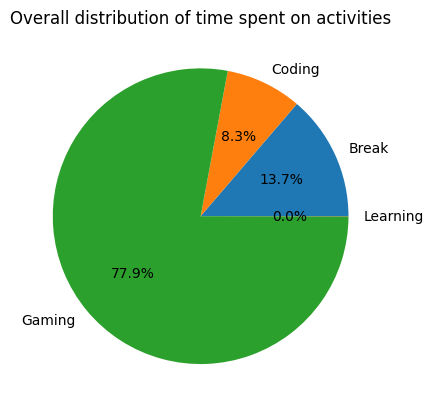

In [20]:
total_data = new_daily_df.groupby('activity').size()

plt.figure()
total_data.plot(kind='pie', autopct='%1.1f%%')
plt.title('Overall distribution of time spent on activities')
plt.show()


In [ ]:
import plotly.express as px

In [24]:
# Calculate duration
new_daily_df['duration'] = new_daily_df.index.to_series().diff().shift(-1).dt.total_seconds().div(60).fillna(0)

new_daily_df.reset_index(inplace=True)

In [26]:
# Create a timeline chart
fig = px.timeline(new_daily_df, x_start='date', x_end=new_daily_df['date'] + pd.to_timedelta(new_daily_df['duration'], unit='m'), y='activity', color='activity')
fig.update_yaxes(autorange="reversed")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed